In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm.notebook import tqdm

In [2]:
if not os.path.exists('gpu_energies'):
    os.mkdir('gpu_energies')

# Villain

$$\tilde V(n_p) = n_p^2 $$

Calculate average $\mathcal{E}(K) = \frac{1}{L^4} \sum_p \frac{1}{K} \tilde V(n_p)$

In [3]:
inv_ks = list(np.linspace(0.1,1.0,30))
inv_ks = inv_ks + list(np.linspace(0.7,0.9,30))
inv_ks = np.array(list(sorted(set(inv_ks))))

In [4]:
L = 16
ws = list(range(5))

filename = "gpu_energies/winding_nums.npz"
if not os.path.exists(filename):
    all_windings = []
    all_energies = []
    for inv_k in tqdm(inv_ks,desc='K'):
        k_winding_nums = []
        k_energies = []
        for w in ws:
            state = np.zeros((1,L,L,L,L,6), dtype=np.int32)
            state[0,0,:,:,0,3] = w
            vns = [(n**2)*inv_k for n in range(200)]
            graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns,initial_state=state)

            graph.run_local_update(1000)

            winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, 
                                                                                      run_global_updates=False)
            k_winding_nums.append(winding_nums[0])
            k_energies.append(energies[0])
        all_windings.append(k_winding_nums)
        all_energies.append(k_energies)
    all_windings = np.array(all_windings)
    all_energies = np.array(all_energies)
    np.savez(filename, all_windings=all_windings, all_energies=all_energies)
else:
    arr = np.load(filename)
    all_windings = arr['all_windings']
    all_energies = arr['all_energies']

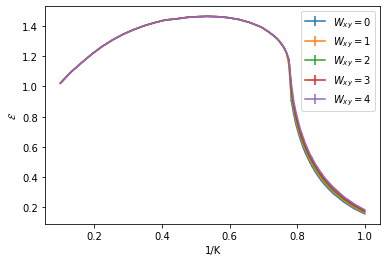

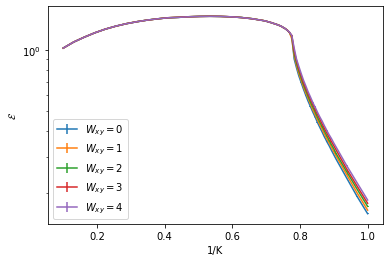

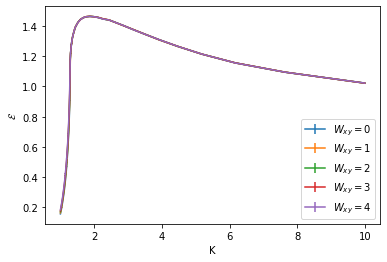

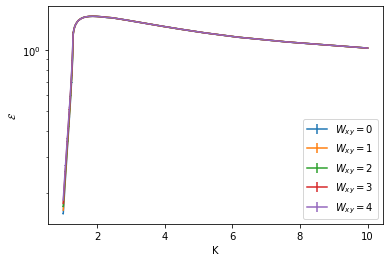

In [5]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()

In [6]:
Ls = np.arange(4,18,2)

filename = 'gpu_energies/energy_curves.npz'

if not os.path.exists(filename):
    all_windings = []
    all_energies = []
    for inv_k in tqdm(inv_ks,desc='K'):
        k_winding_nums = []
        k_energies = []
        for L in Ls:
            vns = [(n**2)*inv_k for n in range(200)]
            graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)

            graph.run_local_update(1000)

            winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, 
                                                                                      run_global_updates=True)
            k_winding_nums.append(winding_nums[0])
            k_energies.append(energies[0] / (L**4))
            assert len(graph.get_violations()) == 0
        all_windings.append(k_winding_nums)
        all_energies.append(k_energies)
    all_windings = np.array(all_windings)
    all_energies = np.array(all_energies)
    np.savez(filename, all_windings=all_windings, all_energies=all_energies)
else:
    arr = np.load(filename)
    all_windings = arr['all_windings']
    all_energies = arr['all_energies']

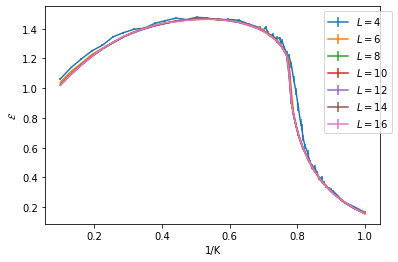

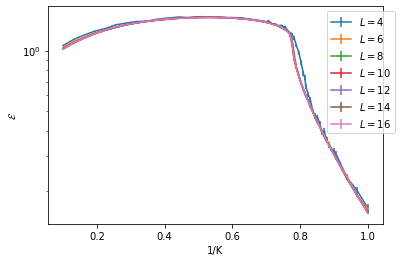

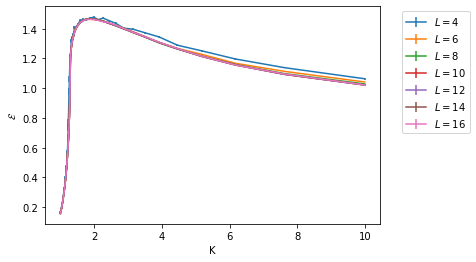

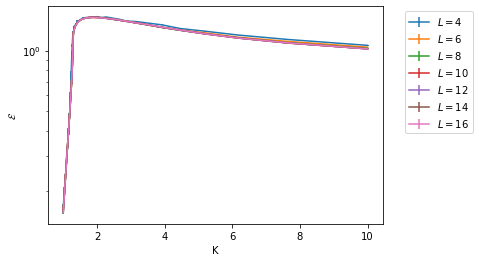

In [7]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()

## Measuring $K_r$
<!-- There are some issues below -->
<!-- Dual picture:

$$Z = \sum_{\{n_p\}} \left( \prod_e \delta\left[d_{pe} n_p\right]\right)e^{\tilde V_{n_p}} e^{i n_p f_p}$$

$S_eff = - \mbox{ln} Z$

$$\partial_f S_{eff} \vert_{f=0} = - \frac{\partial_f^2 Z}{Z^2} + \left(\frac{\partial_f Z}{Z}\right)^2$$

$$\partial_f^2 S_{eff} = \frac{1}{(L_1 L_2)^2} \langle \left( \sum n_p \right)^2 \rangle^c$$

Villain Phase picture:

$$\partial_f^2 S_{eff} \vert_{f=0} = - K^2 \langle (\sum d_{pe} a_e)^2\rangle^c / L^4$$ -->

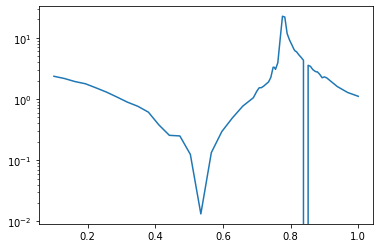

0.7758620689655172

In [8]:
largest_size_energy = all_energies[:,-1,:].mean(axis=-1)
grad = np.gradient(largest_size_energy, inv_ks)

# Two of the inv_ks points are very close and may cause blowups.
grad[np.abs(grad)>1e5] = 0

plt.plot(inv_ks, np.abs(grad))
plt.yscale('log')
plt.show()
inv_kc = inv_ks[np.argmax(np.abs(grad))]
inv_kc

In [9]:
def make_graph(l=8, inv_k=1/2.0,vlen=100,device='gpu'):
    if device == 'gpu':
        graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    elif device == 'cpu':
        graph = py_gauge_mc.GaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    return graph

def run_experiment(l,inv_k=1/2.0,vlen=100,samples=100,local_updates_per_step=1,steps_per_sample=1000):
    g = make_graph(l=l, inv_k=inv_k, vlen=vlen)
    g.run_local_update(samples * steps_per_sample * local_updates_per_step)
    winding_nums = g.simulate_and_get_winding_nums(samples,local_updates_per_step=local_updates_per_step,
                                                   steps_per_sample=steps_per_sample)
    return winding_nums[0]

In [10]:
L = 8

filename = 'gpu_energies/villain_critical_winding.npz'

if not os.path.exists(filename):
    critical_winding_nums = run_experiment(L,inv_k=inv_kc,vlen=100, samples=1000, steps_per_sample=1000)
    np.savez(filename, critical_winding_nums=critical_winding_nums)
else:
    arr = np.load(filename)
    critical_winding_nums = arr['critical_winding_nums']
critical_winding_nums.var(axis=0).mean()

0.3691983333333335

In [11]:
1. / (4 * np.pi * np.sqrt(critical_winding_nums.var(axis=0).mean()))

0.13096651467088777

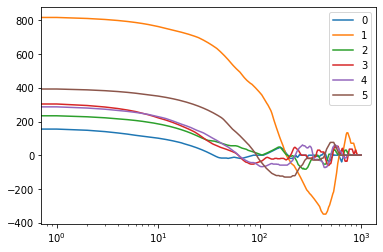

In [12]:
for i in range(critical_winding_nums.shape[-1]):
    autocorr = np.correlate(critical_winding_nums[:,i], critical_winding_nums[:,i], mode='full')[critical_winding_nums.shape[0]:]
    plt.plot(autocorr,label=f'{i}')
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
L = 8

filename = 'gpu_energies/villain_invk_sweep.npz'

if not os.path.exists(filename):
    all_villain_windings = []
    for inv_k in tqdm(inv_ks):
        windings = run_experiment(L,inv_k=inv_k,vlen=100, samples=100, steps_per_sample=1000)
        all_villain_windings.append(windings)
    all_villain_windings = np.array(all_villain_windings)
    np.savez(filename, all_villain_windings=all_villain_windings)
else:
    arr = np.load(filename)
    all_villain_windings = arr['all_villain_windings']

  0%|          | 0/58 [00:00<?, ?it/s]

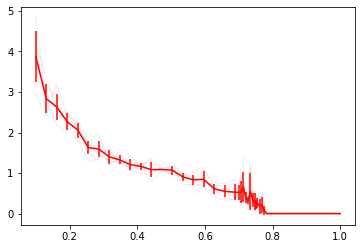

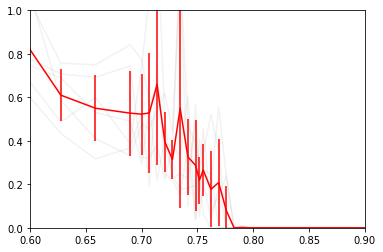

In [19]:
for i in range(all_villain_windings.shape[-1]):
    plt.plot(inv_ks, all_villain_windings[:,:,i].var(axis=-1), c='gray', alpha=0.1)
avg = all_villain_windings[:,:,:].var(axis=-2).mean(axis=-1)
std = all_villain_windings[:,:,:].var(axis=-2).std(axis=-1)
plt.errorbar(inv_ks, avg, yerr=std, c='red')
plt.show()

for i in range(all_villain_windings.shape[-1]):
    plt.plot(inv_ks, all_villain_windings[:,:,i].var(axis=-1), c='gray', alpha=0.1)
avg = all_villain_windings[:,:,:].var(axis=-2).mean(axis=-1)
std = all_villain_windings[:,:,:].var(axis=-2).std(axis=-1)
plt.errorbar(inv_ks, avg, yerr=std, c='red')
plt.xlim([0.6,0.9])
plt.ylim([0.0,1.0])
plt.show()

# Cosine potential

$-S(\theta) = K (1 - \mbox{cos}(\theta))$

$$\int d\theta e^{-S(\theta)} \mbox{cos}(n \theta) = (-1)^n 2\pi J_n(K)$$

But odd numbers always appear in pairs, no sign problem

$\tilde V_n - \tilde V_0 = - \mbox{log} \left( \frac{J_n(K)}{J_0(K)}\right)$

Proof:

Local moves change 3 plaquettes by $+1$ and 3 by $-1$, consider the generalized case of 6 updates of $\pm 1$.
If the graph starts with $n$ odd numbers on it, the first $\pm 1$ brings that to either $n+1$ or $n-1$, and the second to one of $n$, $n+2$, $n-2$. In similar fashion after 6 updates we have $n + 2k$ total odd numbers in the graph with $k$ an integer from $-3$ to $3$. So if $n$ starts even then $n+2k$ remains even.

In [ ]:
import scipy.integrate

In [ ]:
def v(x,k=1.0):
    return (1.0 - np.cos(x))*k

ks = np.linspace(0.1,1.5,15)
for k in ks:
    coeffs = []
    ns = range(50)
    for n in ns:    
        coeffs.append(scipy.integrate.quad(lambda x: np.exp(v(x,k=k)) * np.cos(n*x), -np.pi, np.pi)[0])
    plt.plot(ns, coeffs, label='k={:.1f}'.format(k))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.show()

ks = np.linspace(0.1,1.5,15)
for k in ks:
    coeffs = []
    ns = range(50)
    for n in ns:    
        coeffs.append(scipy.integrate.quad(lambda x: np.exp(v(x,k=k)) * np.cos(n*x), -np.pi, np.pi)[0])
    v_tilde = -np.log(np.abs(coeffs))
    v_tilde = v_tilde - v_tilde[0]
    plt.plot(ns, v_tilde, label='k={:.1f}'.format(k))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.show()

In [ ]:
def v_tilde(ns, k):
    return - np.log(scipy.special.jv(ns, k) / scipy.special.jv(0, k))
plt.plot(v_tilde(np.arange(0,20), 0.25), label="k=0.25")
plt.plot(v_tilde(np.arange(0,20), 0.5), label="k=0.5")
plt.plot(v_tilde(np.arange(0,20), 0.75), label="k=0.75")
plt.plot(v_tilde(np.arange(0,20), 1.0), label="k=1.0")
plt.plot(v_tilde(np.arange(0,20), 1.5), label="k=1.0")
plt.legend()
plt.show()

In [ ]:
L = 16

inv_ks = list(np.linspace(0.8,1.5,60))
inv_ks = np.array(list(sorted(set(inv_ks))))


filename = 'gpu_energies/cosine_energy_curves.npz'
if not os.path.exists(filename):
    cosine_all_windings = []
    cosine_all_energies = []
    for inv_k in tqdm(inv_ks,desc='K'):
        vns = v_tilde(np.arange(0,100), 1./inv_k)
        graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)
        graph.run_local_update(1000)
        winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=100)
        cosine_all_windings.append(winding_nums[0])
        cosine_all_energies.append(energies[0])
    cosine_all_windings = np.array(cosine_all_windings)
    cosine_all_energies = np.array(cosine_all_energies)/(L**4)
    np.savez(filename, cosine_all_windings=cosine_all_windings, cosine_all_energies=cosine_all_energies)
else:
    arr = np.load(filename)
    cosine_all_windings = arr['cosine_all_windings']
    cosine_all_energies = arr['cosine_all_energies']
    np.savez(filename, cosine_all_windings=cosine_all_windings, cosine_all_energies=cosine_all_energies)

In [ ]:
plt.plot(inv_ks, cosine_all_energies.mean(axis=-1))
plt.show()

In [ ]:
largest_size_energy = cosine_all_energies[:,:].mean(axis=-1)
grad = np.gradient(largest_size_energy, inv_ks)
grad[np.abs(grad)>1e5] = 0
plt.plot(inv_ks, np.abs(grad))
plt.yscale('log')
plt.show()
inv_kc = inv_ks[np.argmax(np.abs(grad))]
inv_kc

In [ ]:
def make_graph(l=8, inv_k=1/2.0,vlen=100,device='gpu'):
    vns = v_tilde(np.arange(0,vlen), 1./inv_k)
    if device == 'gpu':
        graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,vns)
    elif device == 'cpu':
        graph = py_gauge_mc.GaugeTheory(l,l,l,l,vns)
    return graph

def run_experiment(l,inv_k=1/2.0,vlen=100,samples=100,local_updates_per_step=1,steps_per_sample=1000):
    g = make_graph(l=l, inv_k=inv_k, vlen=vlen)
    g.run_local_update(samples * steps_per_sample * local_updates_per_step)
    winding_nums = g.simulate_and_get_winding_nums(samples,local_updates_per_step=local_updates_per_step,
                                                   steps_per_sample=steps_per_sample)
    return winding_nums[0]

In [ ]:
L = 8

filename = 'gpu_energies/cosine_critical_winding_nums.npz'

if not os.path.exists(filename):
    critical_winding_nums = run_experiment(L,inv_k=inv_kc,vlen=100, samples=1000, steps_per_sample=1000)
    np.savez(filename, critical_winding_nums=critical_winding_nums)
else:
    arr = np.load(filename)
    critical_winding_nums = arr['critical_winding_nums']
critical_winding_nums.var(axis=0).mean()

In [ ]:
1. / (4 * np.pi * np.sqrt(critical_winding_nums.var(axis=0).mean()))

In [ ]:
for i in range(critical_winding_nums.shape[-1]):
    autocorr = np.correlate(critical_winding_nums[:,i], critical_winding_nums[:,i], mode='full')[critical_winding_nums.shape[0]:]
    plt.plot(autocorr,label=f'{i}')
plt.xscale('log')
plt.legend()
plt.show()

Well thats not great

In [ ]:
L = 8

filename = 'gpu_energies/cosine_invk_sweep.npz'

if not os.path.exists(filename):
    all_cosine_windings = []
    for inv_k in tqdm(inv_ks):
        windings = run_experiment(L,inv_k=inv_k,vlen=100, samples=100, steps_per_sample=1000)
        all_cosine_windings.append(windings)
    all_cosine_windings = np.array(all_cosine_windings)
    np.savez(filename, all_cosine_windings=all_cosine_windings)
else:
    arr = np.load(filename)
    all_cosine_windings = arr['all_cosine_windings']

In [ ]:
for i in range(all_cosine_windings.shape[-1]):
    plt.plot(inv_ks, all_cosine_windings[:,:,i].var(axis=-1), c='gray', alpha=0.1)
avg = all_cosine_windings[:,:,:].var(axis=-2).mean(axis=-1)
std = all_cosine_windings[:,:,:].var(axis=-2).std(axis=-1)
plt.errorbar(inv_ks, avg, yerr=std, c='red')
plt.show()